In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import seaborn as sns 
from scipy import stats
from statannot import add_stat_annotation

sns.reset_defaults()

In [150]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

def exp(x, A, tau, c):
    return A*np.exp(-x/tau) + c

def chi_sq_norm(n, y):
    return stats.chisquare(n, np.sum(n)/np.sum(y) * y)

In [151]:
data_NT_1 = pd.read_excel('all_data.xlsx', sheet_name='TS1_No_Treat')
data_NT_2 = pd.read_excel('all_data.xlsx', sheet_name='TS1_No_Treat_2')
data_pr_1 = pd.read_excel('all_data.xlsx', sheet_name='TS2_NT-Baf')
data_pr_2 = pd.read_excel('all_data.xlsx', sheet_name='TS2_NT-Baf_2')
data_baf = pd.read_excel('all_data.xlsx', sheet_name='TS3_Baf')

datas = [data_NT_1, data_NT_2, data_pr_1, data_pr_2, data_baf]
data_NT_1.head(2)


,Time,t,bg,Intensity Region 2,Intensity Region 3,Intensity Region 4,Intensity Region 5,Intensity Region 6,Intensity Region 8,Intensity Region 9,Intensity Region 10,Intensity Region 11,Intensity Region 12
0,1,0.00000,0.223,15.401,91.923,47.030,57.467,9.889,53.218,9.752,15.233,20.461,25.859
1,2,0.06467,0.164,16.889,87.592,43.462,55.430,9.734,54.715,7.142,14.698,16.828,27.568


In [152]:
for data in datas:
    for col in data.columns[3:]:
        data[col] = data[col]-data['bg']
    data.drop('Time', axis= 1 , inplace= True ) 

In [153]:
#Иногда фон вычитался/прибавлялся там, где не нужно, эта ячейка убирает такие выбросы

for data in datas:
    bg = max(data['bg'])
    for col in data.columns:
        for i, val in enumerate(data[col]):
            if ((i!=0) and (i!=len(data[col])-1)):
                if ((data[col][i]>=data[col][i+1]+bg/2) and (data[col][i]>=data[col][i-1]+bg/2)):
                    data[col][i] = data[col][i]-bg
                elif ((data[col][i]<=data[col][i+1]-bg/2) and (data[col][i]<=data[col][i-1]-bg/2)):
                    data[col][i] = data[col][i]+bg
            

In [154]:
data_NT_1 = data_NT_1.drop(columns=['Intensity Region 3', 'Intensity Region 10', 'Intensity Region 11'])
data_NT_2 = data_NT_2.drop(columns=['Intensity Region 2'])
data_baf = data_baf.drop(columns=['Intensity Region 6', 'Intensity Region 14', 'Intensity Region 15'])

## On/Off detection

In [155]:
# for data in datas:
#     plt.plot(data['bg'])
#     plt.show()
    
#На всех отсечение на 4

In [156]:
off_NT_1 = []
off_NT_2 = []
off_pr_1 = []
off_pr_2 = []
off_baf = []
offs = [off_NT_1, off_NT_2, off_pr_1, off_pr_2, off_baf]

on_NT_1 = []
on_NT_2 = []
on_pr_1 = []
on_pr_2 = []
on_baf = []
ons = [on_NT_1, on_NT_2, on_pr_1, on_pr_2, on_baf]

In [157]:
flag = 0
for num, data in enumerate(datas):
    for i in range(len(data['t'])):
        if ((flag == 0) and  (data['bg'][i]>=5)):
            flag = 1
            ons[num].append(i-1)
        if ((flag == 1) and (data['bg'][i]<=5)):
            flag = 0
            offs[num].append(i-2)
    ons[num].append(len(data['t']))
    

<Figure size 3000x2000 with 0 Axes>

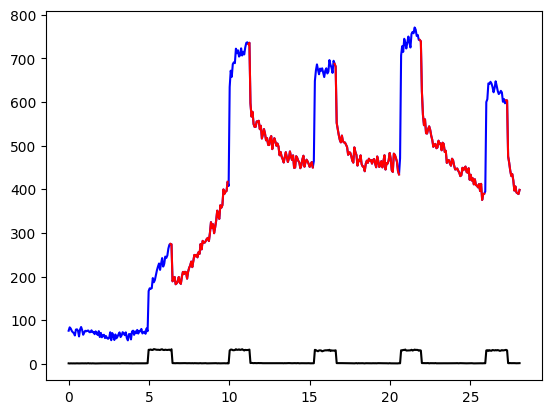

<Figure size 3000x2000 with 0 Axes>

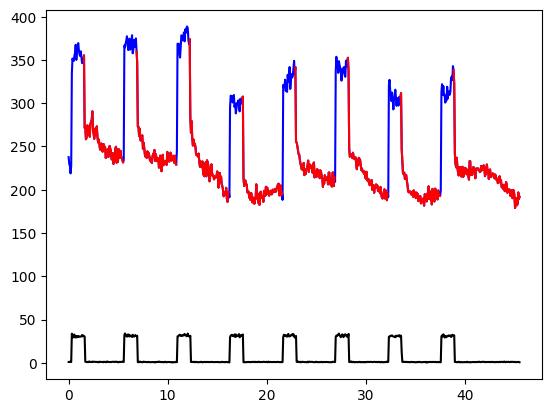

<Figure size 3000x2000 with 0 Axes>

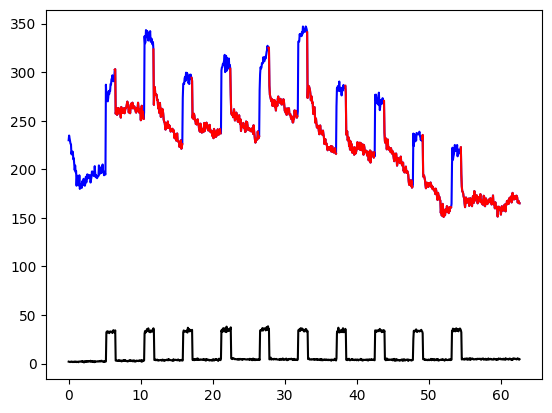

<Figure size 3000x2000 with 0 Axes>

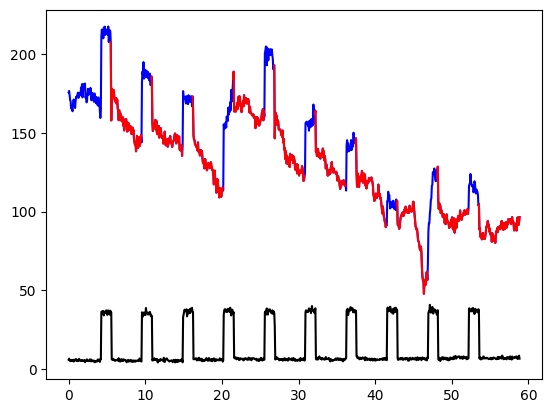

<Figure size 3000x2000 with 0 Axes>

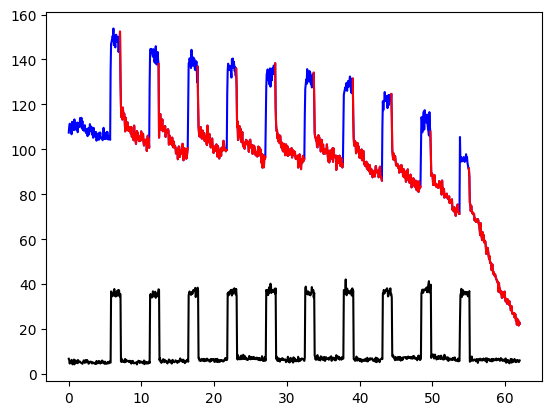

In [158]:

for num, data in enumerate(datas):
    plt.figure(figsize=(30, 20))
    fig, axs = plt.subplots(1,1)
    axs.plot(data.t, data['bg']*5, color='black', label='bg')
    axs.plot(data.t, data[data.columns[2]]*5, color='blue', label='response')

    for i in range(len(offs[num])):
        axs.plot(data.t[offs[num][i]:ons[num][i+1]], data[data.columns[2]][offs[num][i]:ons[num][i+1]]*5,
                 color='red')#, label='mut-FIT')

    plt.show()

## Curve FIT with Chi2

In [159]:
on_NT_1

[76, 154, 236, 319, 401, 435]

In [160]:
off_NT_1

[98, 173, 256, 338, 421]

In [161]:
data_NT_1.head()

,t,bg,Intensity Region 2,Intensity Region 4,Intensity Region 5,Intensity Region 6,Intensity Region 8,Intensity Region 9,Intensity Region 12
0,0.00000,0.223,15.178,46.807,57.244,9.666,52.995,9.529,25.636
1,0.06467,0.164,16.725,43.298,55.266,9.570,54.551,6.978,27.404
2,0.12934,0.219,16.176,45.887,57.759,8.629,50.380,7.767,26.381
3,0.19401,0.189,15.092,45.237,56.885,10.495,52.568,8.829,27.918
4,0.25868,0.187,14.495,45.895,56.309,9.489,53.959,8.143,28.090


[-334395.25135924   29155.04826564  334428.96486634]
[41.19171586  0.69225685 93.33673439]
[43.11170625  0.27007632 92.89310704]
[48.93988218  0.99313551 83.19448186]
[46.11551624  0.18825146 78.05219006]


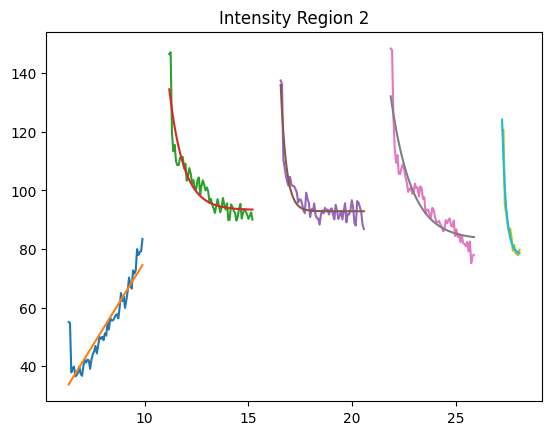

[11.86510365  0.27747402 50.33145205]
[14.35766617  1.37395566 49.49304899]
[10.38167533  1.09924606 49.67828912]
[19.51925658  2.13696538 42.20646766]
[-20093.29599985  -2849.7937627   20142.40384388]


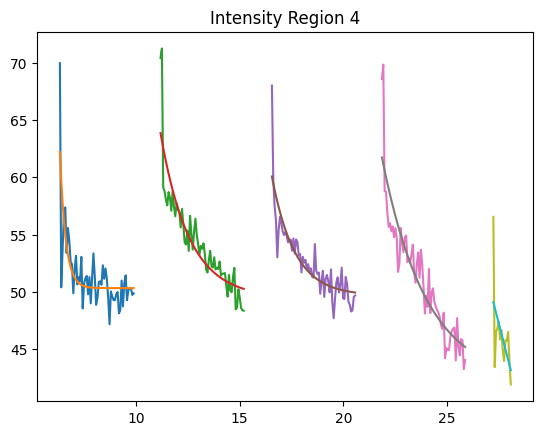

[39.66835679  0.35223821 71.91220532]
[21.39312535  1.0401175  50.08758025]
[28.81147127  0.19712159 67.70090959]
[52.15238998  1.27164541 61.92421103]
[ 1.07574526e-02 -1.19524029e-01  7.59398007e+01]


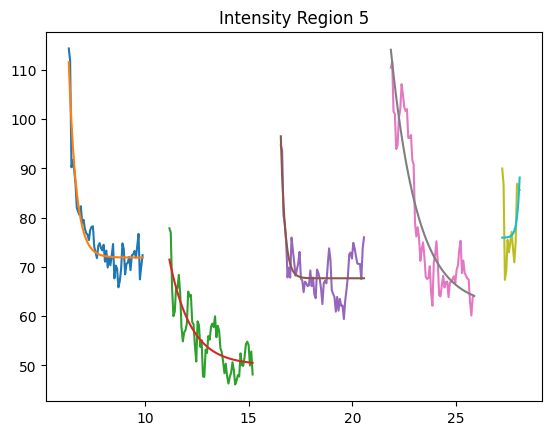

[30.97948451  0.56055183 27.04388439]
[24.68852185  0.55961222 25.58870578]
[60.87406955  3.58528246 -6.75131412]
[20.32921602  0.1805327  19.92931209]
[-42478.06730057  -1679.67178779  42522.94521774]


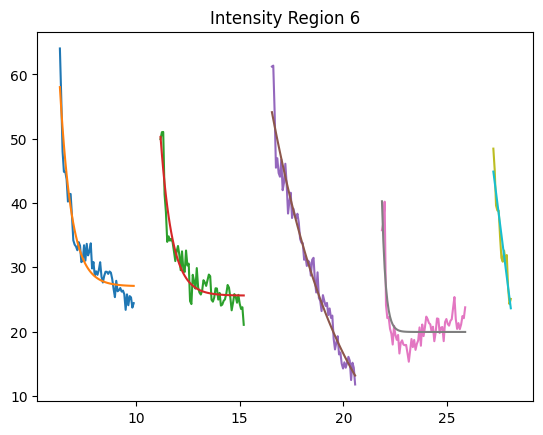

[43.31313676  1.83334894 45.46366207]
[31.23642174  0.74554539 47.68805081]
[32.87270063  0.36604249 47.91724405]
[24.37748304  0.26194135 59.71094362]
[29.9606222   0.28524761 78.03398616]


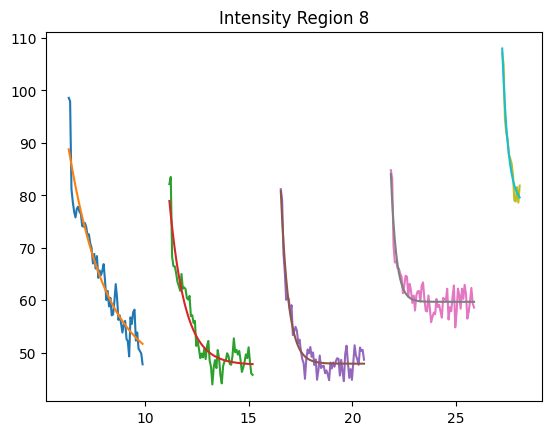

[34.97228106  0.60085886 38.07518516]
[36.26068891  0.56135803 27.45990762]
[31.35832274  1.23122255 20.02069078]
[17.75590065  0.21341057 22.01834573]
[-24818.73263452  -1896.72068605  24857.92743501]


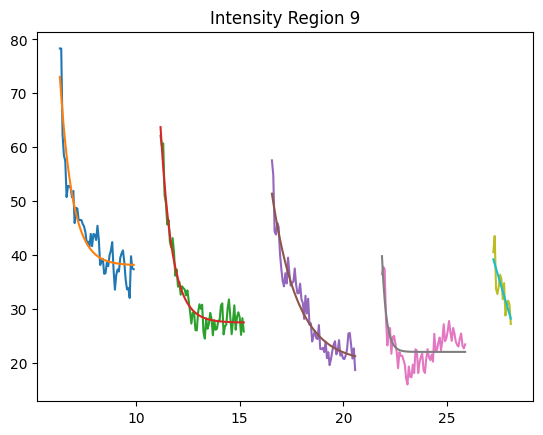

[25.50136982  0.34533306 35.34828508]
[26.52176311  0.51612133 32.14478203]
[23.14732176  0.61126701 27.20632553]
[20.74378761  0.92861253 26.25225813]
[-148902.06794609   -7798.62060682  148941.49576641]


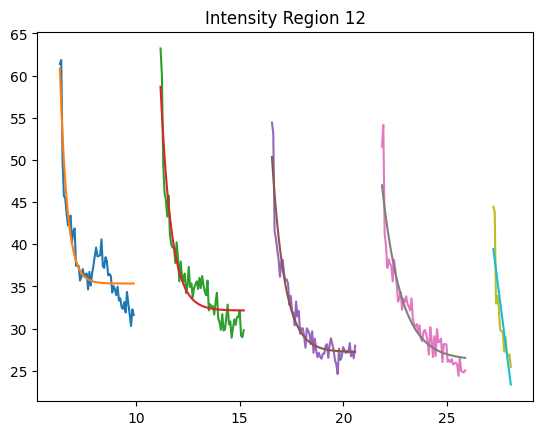

In [162]:
taus_NT_1 = [] #список списков тау по колонкам

for num, col in enumerate(data_NT_1.columns[2:]):
    t = np.array(data_NT_1['t']) #массив всего времени
    val = np.array(data_NT_1[col]) #массив всех величин столбца
    
    ts = [] #список списков времен по отрезкам
    vals = [] #список списков величин по отрезкам
    
    tau = [] #список тау
    
    for i in range(len(off_NT_1)):
        ts.append(t[off_NT_1[i]:on_NT_1[i+1]])
        vals.append(val[off_NT_1[i]:on_NT_1[i+1]])

    for i in range(len(off_NT_1)):
        popt, pcov = curve_fit(exp, ts[i]-ts[i][0], vals[i], p0 = [14.35761592,  1.37388668, 49.4932579])
        print(popt)
        plt.plot(ts[i], vals[i])
        plt.plot(ts[i], exp(ts[i]-ts[i][0], *popt))
        tau.append(popt[1])
        
#         chi = stats.chisquare(vals[i], exp(ts[i]-ts[i][0], *popt))[0]
#         print('chi2 = ',  chi)
#         curve_fit
       
        
    taus_NT_1.append(tau)

    plt.title(col)
    plt.show()

[ 8.28927507  1.3145311  27.20902339]
[ 6.87788931  0.42923523 26.03124456]
[ 6.87609997  0.7363948  24.09022133]
[18.20276563  2.37949107 13.51752842]
[ 4.01136079  1.41452355 17.58633411]
[ 4.190617    0.86654408 18.41463742]
[ 3.40018675  0.9517288  20.22306864]
[ 3.87776349  0.26686167 23.13473245]


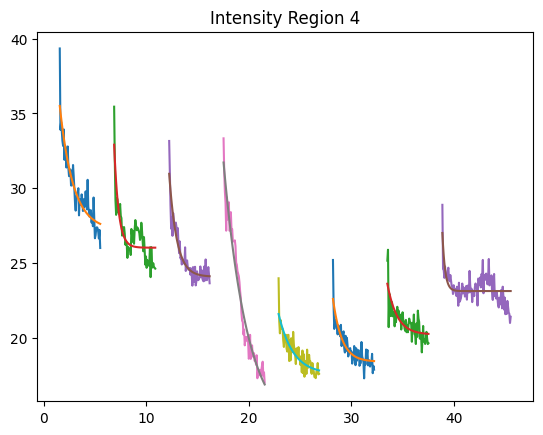

[11.09761163  0.62361048 20.21095872]
[16.14493876  0.45336627 19.8902009 ]
[12.06361966  0.4496218  19.51189201]
[15.33322721  0.42240283 20.82166084]
[14.13228889  0.38855639 21.3526867 ]
[20.8746573   0.66802221 21.640591  ]
[17.72761682  0.35065328 22.22966487]
[16.0084982   1.14462415 20.95398423]


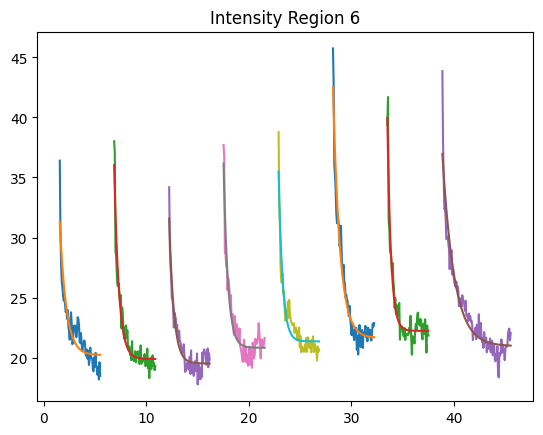

[24.5263024   1.38652146 40.88845082]
[27.35088966  0.47455745 41.25655623]
[22.04031154  0.97616961 36.49776033]
[17.00743576  0.78482831 34.38737761]
[26.33565297  1.61969081 32.54759568]
[20.84897588  0.55563688 35.00636615]
[16.87941451  1.36833514 33.03323527]
[20.10903064  0.67520987 25.21511616]


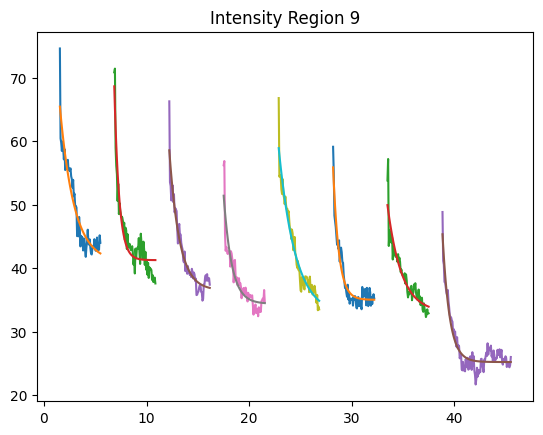

[18.09089876  0.68550035 44.30155615]
[28.67399308  0.2697453  43.34065109]
[22.70299306  0.11015127 46.45300054]
[27.40248038  0.28139986 44.66233368]
[23.95101903  0.13680041 45.24005949]
[26.83773309  0.16469863 43.03001572]
[30.94116312  0.20996244 42.98459327]
[20.86326516  0.66048504 35.20788302]


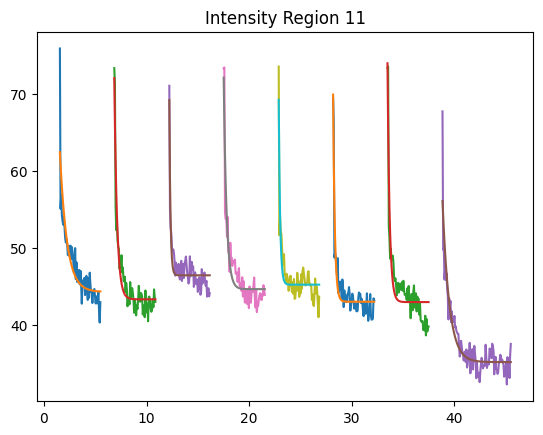

[ 8.72535111  0.86064875 25.52754379]
[ 9.10519067  0.3098052  27.33108083]
[10.51334272  0.28735798 26.55809745]
[ 9.74131168  0.8667438  24.05496168]
[ 7.39256382  1.05444413 24.26183142]
[ 9.05692936  0.72497036 24.37838249]
[12.21577924  0.20387648 24.83509875]
[ 8.31152065  1.37685144 24.4020437 ]


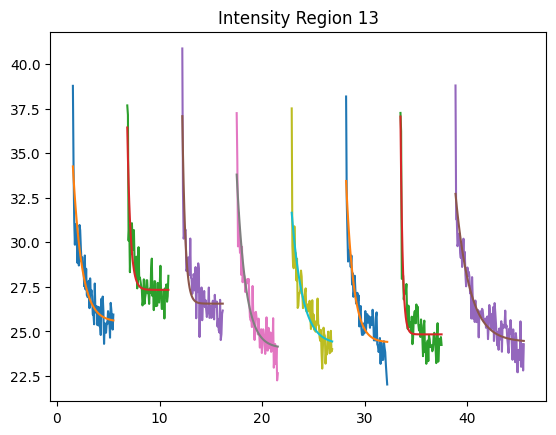

In [163]:
taus_NT_2 = [] #список списков тау по колонкам

for num, col in enumerate(data_NT_2.columns[2:]):
    t = np.array(data_NT_2['t']) #массив всего времени
    val = np.array(data_NT_2[col]) #массив всех величин столбца
    
    ts = [] #список списков времен по отрезкам
    vals = [] #список списков величин по отрезкам
      
        
        
        
        
    tau = [] #список тау
    
    for i in range(len(off_NT_2)):
        ts.append(t[off_NT_2[i]:on_NT_2[i+1]])
        vals.append(val[off_NT_2[i]:on_NT_2[i+1]])

    for i in range(len(off_NT_2)):
        popt, pcov = curve_fit(exp, ts[i]-ts[i][0], vals[i], p0 = [6.87777499,  0.42925937, 26.03121688])
        print(popt)
        plt.plot(ts[i], vals[i])
        plt.plot(ts[i], exp(ts[i]-ts[i][0], *popt))
        tau.append(popt[1])
        
#         chi = stats.chisquare(vals[i], exp(ts[i]-ts[i][0], *popt))[0]
#         print('chi2 = ',  chi)
#         curve_fit
       
        
    taus_NT_2.append(tau)

    plt.title(col)
    plt.show()

[ 9.38934     0.08587881 52.18734883]
[14.508659    1.96264368 43.52124802]
[10.09240881  0.24274497 48.1450446 ]
[ 7.62739163  1.24254706 46.8928286 ]
[13.51909009  0.17747028 52.41225176]
[18.19661424  1.46975294 42.33125901]
[13.34033763  0.18771512 43.84044117]
[32.17626688 10.76173427 14.89576391]
[11.79918279  1.98595233 29.73869586]
[10.81667682  0.12256544 33.28503148]


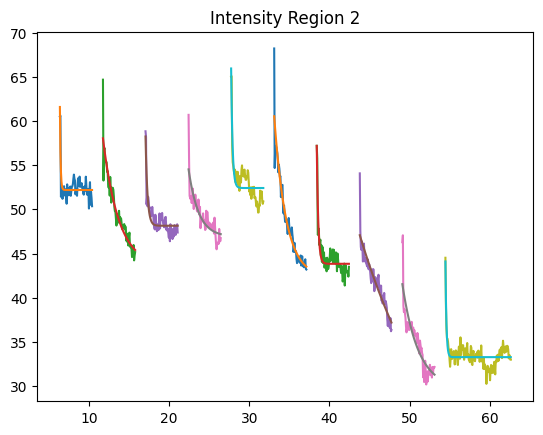

[ 9.83871755  0.39590266 41.73221738]
[13.85593112  1.74084638 34.34282451]
[ 8.4386435   0.5235928  37.15561631]
[13.27180127  1.99035377 30.11409256]
[ 9.9355391   0.13212669 33.48063931]
[ 9.07573247  1.25670773 31.60014085]
[ 8.84725308  0.19800479 32.18897617]
[ 7.32950818  1.53334841 30.30269099]
[ 6.15041119  0.74817593 31.484082  ]
[ 7.28915718  3.7763838  29.39616548]


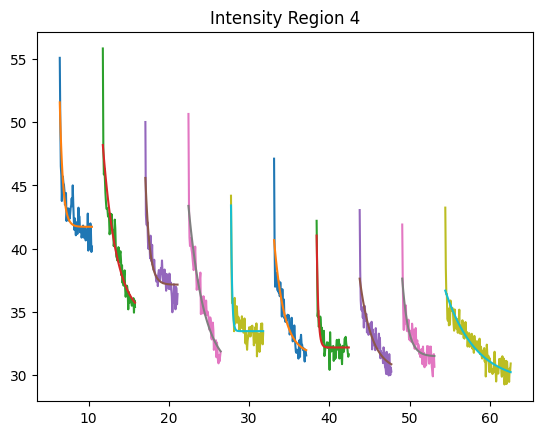

[11.83274356  0.19935622 21.84942169]
[ 9.70754771  0.39410723 24.14449626]
[14.12043517  0.43958275 24.52766876]
[14.3323791   0.87190335 21.33119474]
[11.1476691   0.61224613 21.33138599]
[13.35727921  0.65954424 18.72854498]
[11.90614003  0.72643151 18.1422842 ]
[10.78215541  1.18982908 15.88500707]
[ 7.61440846  1.00588427 14.61517212]
[ 8.44509032  2.12930917 10.44865027]


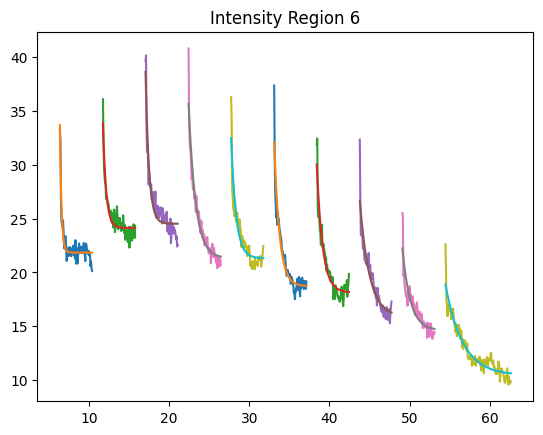

[17.28512432  0.17241666 51.92895587]
[ 3.00334364e-04 -4.29856840e-01  6.16018823e+01]
[24.38905583  0.13024277 62.20143825]
[19.349197    0.09321227 60.00529467]
[21.16891582  0.13516071 60.3353538 ]
[19.92723972  1.26225082 48.63823005]
[13.29120365  0.07779632 56.21369067]
[21.28621666  0.11015262 53.86184708]
[-10236.99894717 -26507.46854389  10290.24500035]
[19.02530727 10.59109047 40.68764284]


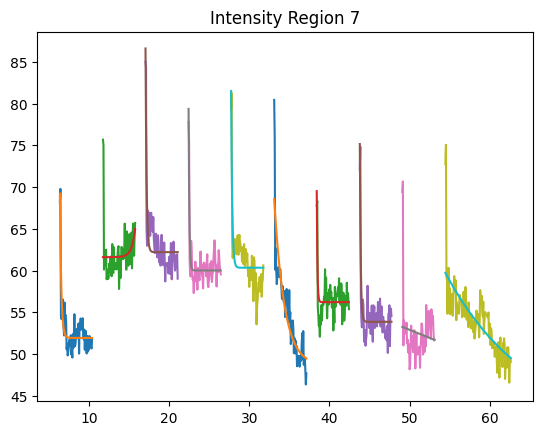

[11.58715452  0.41504355 25.90264526]
[10.56257746  0.20245194 21.42710162]
[10.16346393  0.16336599 20.86363924]
[ 9.04046683  0.26894272 20.56051021]
[10.35393586  0.21644805 18.600636  ]
[ 7.30476276  0.49701098 18.17428498]
[ 8.61104779  0.14693047 18.04197147]
[ 9.48421869  0.15443428 18.70319706]
[10.4201007   0.15627023 17.59066761]
[ 4.40292135  2.9189085  16.90925889]


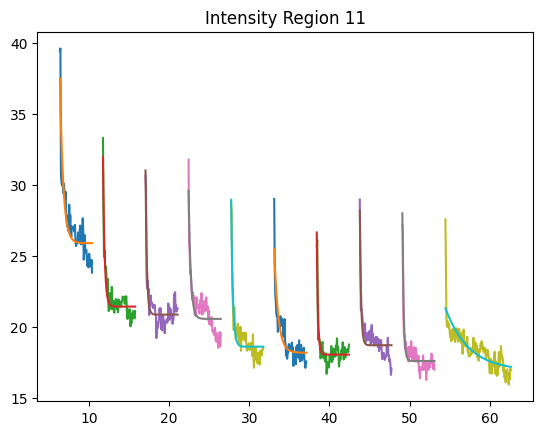

[ 8.12598854  0.51102677 12.49072945]
[ 2.79030457  1.33576802 12.18017182]
[ 5.0993352   0.41026672 10.72437262]
[ 4.6600741   0.07145003 13.72965941]
[ 8.17041042  0.14384247 15.22664349]
[ 6.21189843  0.9374945  13.83052435]
[ 5.7665942   0.19243459 14.55014387]
[ 5.31903392  1.6706911  13.20763504]
[ 4.09097824  1.72362784 14.23948485]
[ 7.26138867  7.50090732 10.28646361]


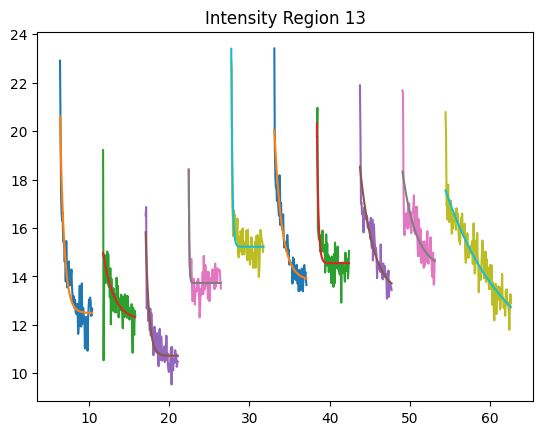

[ 5.69549483  0.62599572 11.17769045]
[ 4.31147977  0.33603717 11.36279289]
[ 5.72110463  0.33579237 11.090274  ]
[ 2.82028492  0.47676953 10.49644546]
[ 4.60277552  0.17449311 11.11300701]
[ 6.42247721  0.14188527 11.33093344]
[ 2.69308171  0.309831   10.85909682]
[4.34798299 0.65383393 9.81891313]
[ 4.95518897  0.18998329 10.3539042 ]
[4.12945832 2.45032937 9.78345296]


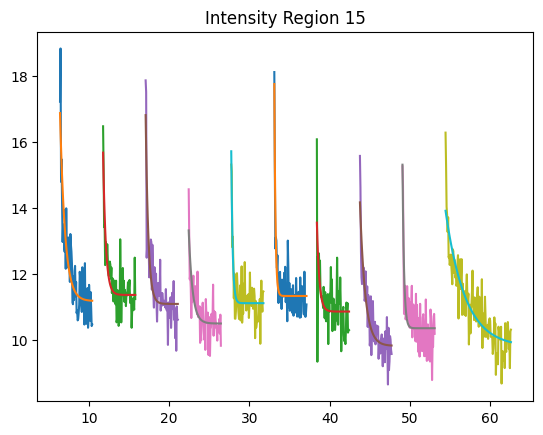

In [164]:
taus_pr_1 = [] #список списков тау по колонкам

for num, col in enumerate(data_pr_1.columns[2:]):
    t = np.array(data_pr_1['t']) #массив всего времени
    val = np.array(data_pr_1[col]) #массив всех величин столбца
    
    ts = [] #список списков времен по отрезкам
    vals = [] #список списков величин по отрезкам
    
    tau = [] #список тау
    
    for i in range(len(off_pr_1)):
        ts.append(t[off_pr_1[i]:on_pr_1[i+1]])
        vals.append(val[off_pr_1[i]:on_pr_1[i+1]])

    for i in range(len(off_pr_1)):
        popt, pcov = curve_fit(exp, ts[i]-ts[i][0], vals[i], p0 = [ 9.07573029,  1.25669588, 31.60016342])
        print(popt)
        plt.plot(ts[i], vals[i])
        plt.plot(ts[i], exp(ts[i]-ts[i][0], *popt))
        tau.append(popt[1])
        
#         chi = stats.chisquare(vals[i], exp(ts[i]-ts[i][0], *popt))[0]
#         print('chi2 = ',  chi)
#         curve_fit
       
        
    taus_pr_1.append(tau)

    plt.title(col)
    plt.show()

[ 8.96830422  2.13796623 27.39818037]
[ 6.60759701  0.35240649 29.03808195]
[11.39629689  3.21162238 19.3772819 ]
[36.45135174 46.099666   -1.89554937]
[ 9.84787026  1.57153784 23.98580065]
[ 6.93805687  1.97697622 22.69245495]
[ 47937.60036384  30914.29278139 -47911.58326096]
[ 77440.22557979  34215.46241061 -77418.16965992]
[ 5.878214    0.23624137 19.02523192]
[ 3.38627339  0.07708086 17.87730563]


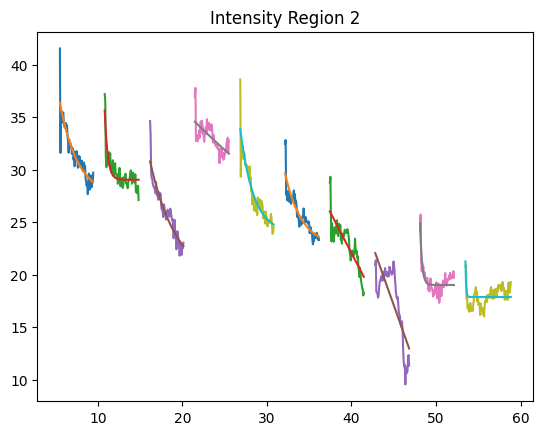

[ 9.12048218  0.22053147 27.83482707]
[ 6.54460004  0.61666955 28.29794288]
[ 8.40124393  0.34797001 26.97685374]
[ 9.2400839   0.16267345 29.66156225]
[ 6.02186796  0.90718574 27.76510719]
[ 7.64719952  1.07765729 25.66586529]
[ 7.93007069  0.22307715 25.66742925]
[ 5.32995885  0.57638435 24.22845791]
[ 7.06480206  0.70709531 24.30868971]
[ 4.78758051  1.27405029 22.24148107]


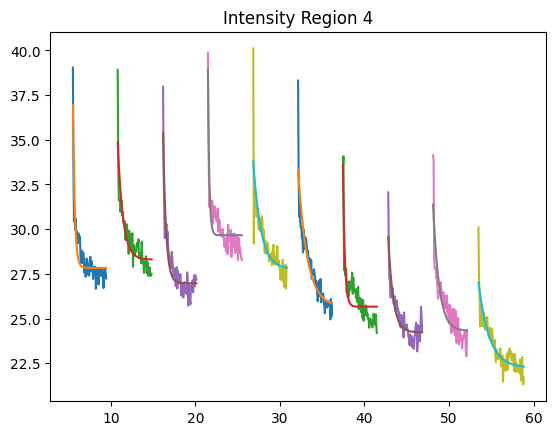

[ 5.99762398  0.25033841 12.72885856]
[ 7.09497227  0.12175436 13.14550871]
[ 6.56278284  0.17154179 12.6341069 ]
[ 3.90354767  1.48586765 10.730524  ]
[3.59191749 1.13352142 9.32045863]
[ 5775.84870768 11580.33183773 -5763.60371759]
[5.17068169 0.69109912 8.71140355]
[4.1733932  0.15657593 9.27494433]
[4.36552014 0.97702302 6.49954335]
[3.41218112 0.39234705 6.3592659 ]


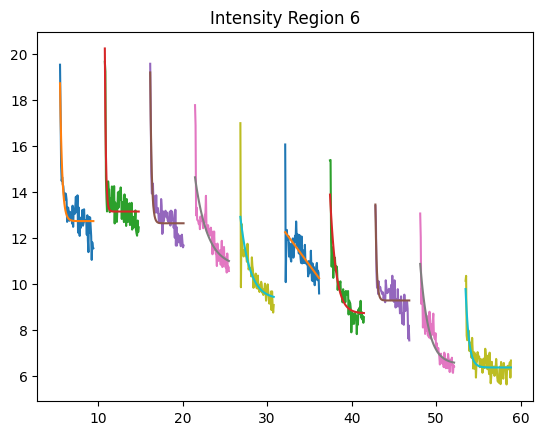

[21.17191309  0.20990186 43.55396122]
[28.17727633  0.19347419 41.75200313]
[2.44351940e+01 3.77249777e-02 4.21500385e+01]
[26.53340928  0.14780406 44.03434295]
[19.44892242  0.1106433  42.68557386]
[23.94440722  0.21010015 40.53004117]
[22.87147139  0.17662122 38.27625745]
[1.91405144e+01 2.78405945e-02 3.87807317e+01]
[23.31819712  0.21664897 34.61179253]
[15.93743254  0.05317445 33.11904804]


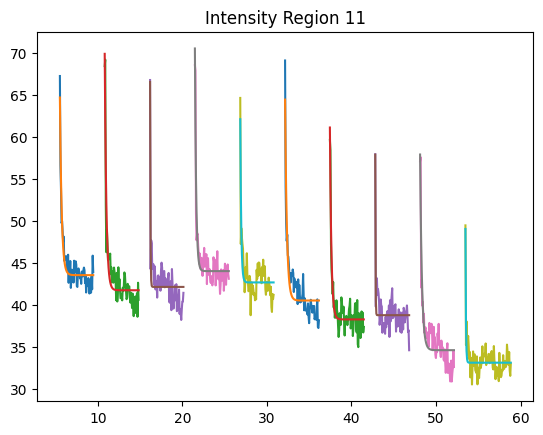

[6.18330556 0.13722128 9.42985836]
[5.1576067  0.51625404 7.67149854]
[4.20279663 0.07067212 8.2924941 ]
[5.03549596 0.09867834 8.51904095]
[4.28250820e+00 3.42286262e-05 9.67549180e+00]
[4.22680169 0.61331973 9.7308978 ]
[5.4380707  0.12341135 9.86833275]
[ 3.91328555  1.29884762 10.02097148]
[ 4.5961347   0.67973326 11.35811643]
[6.35323695 3.90104152 8.18412813]


C:\Users\nsf30\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


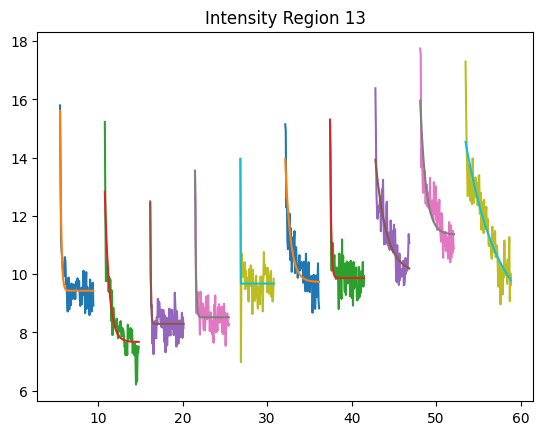

[ 4.82242222  1.58217215 13.86278697]
[ 5.84171393  1.34836486 13.87098271]
[ 3.13378346  0.1394833  15.4440398 ]
[ 2894.72399927 40323.7037383  -2877.23202558]
[ 49.4113278   25.28578194 -29.69037275]
[ 21366.02941137  19617.9253585  -21349.80587624]
[ 2.9957133   0.82641615 14.17858304]
[7.86884196 5.28241967 9.26986754]
[ 5.81138485  2.21728494 10.16362135]
[ 2.65484736  0.41956103 11.61583722]


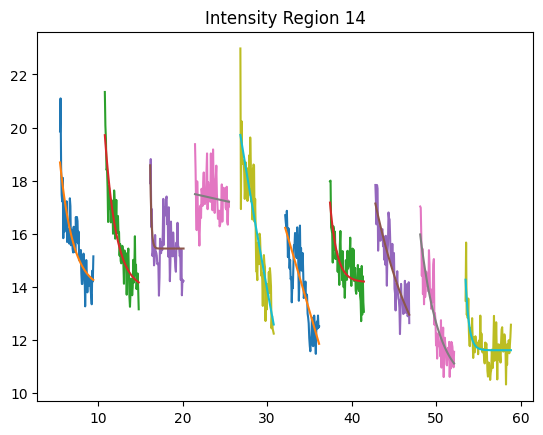

[ 4.11259542  0.41158607 10.481776  ]
[ 6.07317688  0.15107964 12.0489888 ]
[ 5.48577788  0.0645885  13.59777406]
[ 3.5815897   1.750761   12.75437553]
[ 6.62731786  0.13687846 13.35859982]
[ 5.38129299  0.21895679 12.44731824]
[8.76188737 6.53256456 8.37321536]
[ 4.19660601  0.06173766 15.28477165]
[ 6.75033522  0.49016959 13.07074841]
[ 4.86945105  0.10538845 13.94394413]


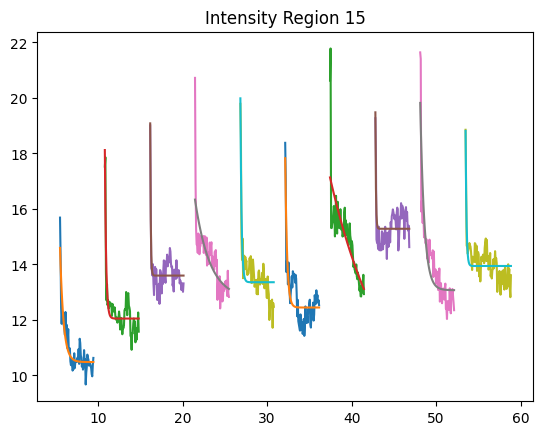

[ 4.37165341  0.06918159 11.8426105 ]
[ 5.66310738  0.14516575 13.17731192]
[ 4.90673791  0.10222255 13.32389796]
[ 5.65354189  0.10088216 13.80576051]
[ 6.42169233  0.1230897  13.84625059]
[ 6.02456435  0.12624435 13.56459936]
[ 6.63318524  0.10216899 14.53397441]
[ 6.65528547  0.11034181 14.59091404]
[ 7.10767299  0.20750324 13.48547283]
[ 17406.63399945  49750.75084958 -17390.888434  ]


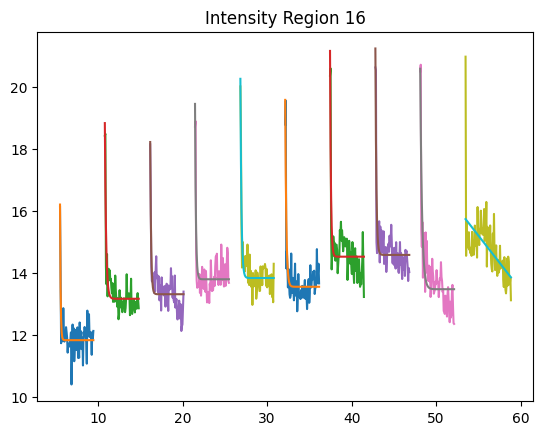

In [172]:
taus_pr_2 = [] #список списков тау по колонкам

for num, col in enumerate(data_pr_2.columns[2:]):
    t = np.array(data_pr_2['t']) #массив всего времени
    val = np.array(data_pr_2[col]) #массив всех величин столбца
    
    ts = [] #список списков времен по отрезкам
    vals = [] #список списков величин по отрезкам
    
    tau = [] #список тау
    
    for i in range(len(off_pr_2)):
        ts.append(t[off_pr_2[i]:on_pr_2[i+1]])
        vals.append(val[off_pr_2[i]:on_pr_2[i+1]])

    for i in range(len(off_pr_2)):
        popt, pcov = curve_fit(exp, ts[i]-ts[i][0], vals[i], p0 = [6.02183649,  0.90722841, 27.76505473])
        print(popt)
        plt.plot(ts[i], vals[i])
        plt.plot(ts[i], exp(ts[i]-ts[i][0], *popt))
        tau.append(popt[1])
        
#         chi = stats.chisquare(vals[i], exp(ts[i]-ts[i][0], *popt))[0]
#         print('chi2 = ',  chi)
#         curve_fit
       
        
    taus_pr_2.append(tau)

    plt.title(col)
    plt.show()

[ 7.04387506  0.29396697 21.16645739]
[ 4.43259673  1.35564465 19.35869034]
[ 6.70655069  0.11761997 20.43303594]
[ 6.16266611  0.27894453 19.96090862]
[ 6.17881994  0.29374599 19.53342037]
[ 6.27603231  0.23115657 19.50863694]
[ 5.05755444  0.8132484  17.89364834]
[ 5.31009375  0.56978924 17.17798183]
[ 5.43392861  2.6650301  13.26973693]
[20.45465824  8.10778935 -4.27211582]


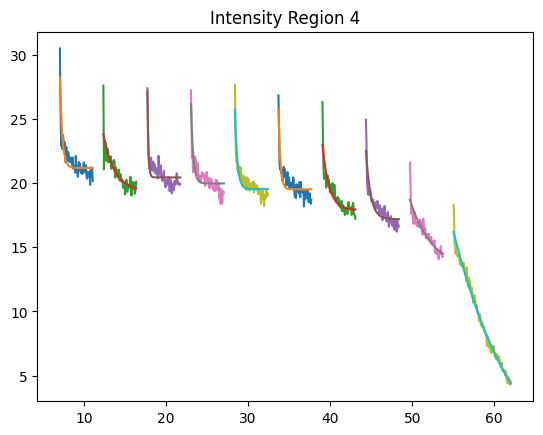

[ 6.93301792  0.32229385 20.19912021]
[ 7.08291204  0.41118012 19.78185811]
[ 7.16915675  0.17499654 19.51775167]
[ 7.10031017  0.42324453 19.41780065]
[ 5.31934071  0.35476063 18.70763913]
[ 7.04066242  0.48724251 18.62837305]
[ 2980.96173555  6870.92654084 -2961.70985958]
[ 7.11565159  0.65625594 17.0690633 ]
[ 6.34523333  0.13923372 16.43506994]
[ 5.69848297  0.11749835 16.61029172]


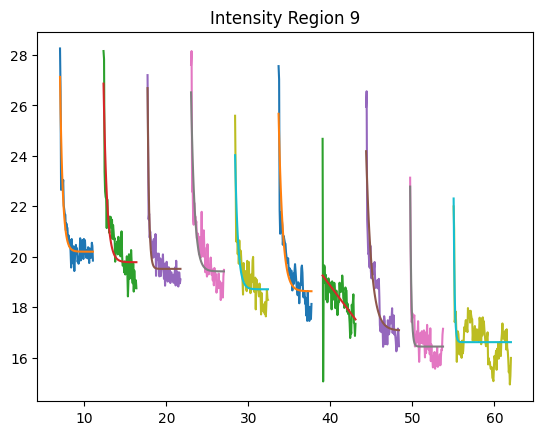

[ 8.24447877  0.10246099 12.53577266]
[ 2092.14502465  5776.9696515  -2079.21793512]
[ 6.69668993  0.09423025 11.53483998]
[ 9.30309752  0.21667426 11.909092  ]
[ 5.72643405  0.55558586 10.15472093]
[4.57932862 1.13050587 9.18055711]
[3.40606008 0.13482211 8.71811847]
[6.33597874 0.12834181 9.26681681]
[3.6161504  0.2660212  6.18435747]
[2.23878228 3.269032   5.31954293]


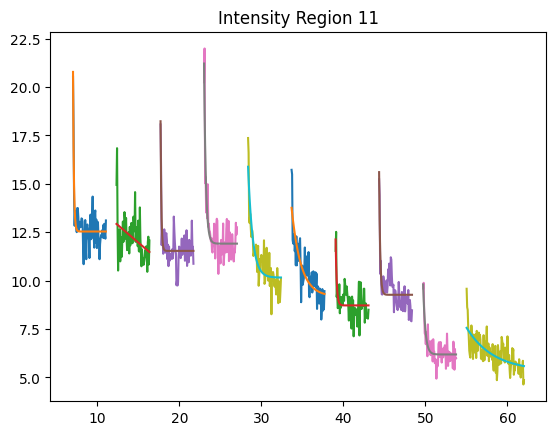

[ 4.82890782  0.51273221 13.49430301]
[ 6.2287357   0.1464505  14.21159028]
[ 8.242173    0.13365344 13.59020183]
[ 6.48182136  0.16430884 12.64276093]
[ 4.12086504  0.73919108 13.58044993]
[ 9.40093214  0.15180738 14.31887524]
[ 6.63821594  0.093964   14.97291992]
[ 8.70049667  0.31198044 13.40732873]
[17.63055858  1.68601004  0.09184939]
[2.21051488 3.59566828 3.18121222]


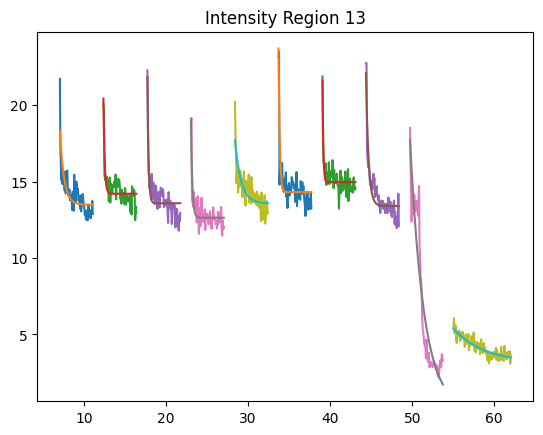

[6.89644382 0.10423085 9.82770186]
[ 4.64346065  0.10022666 10.93070675]
[5.99024598 0.15200157 9.84211887]
[6.33398783 0.11444638 9.51220093]
[5.11353791 0.10871335 9.20982709]
[6.74480843 0.0896999  9.75000267]
[5.82561602 0.09214134 9.18976069]
[6.09738897 0.09837389 9.45012956]
[4.90927662 0.06181048 8.97117042]
[2.35681792 2.930608   8.4412202 ]


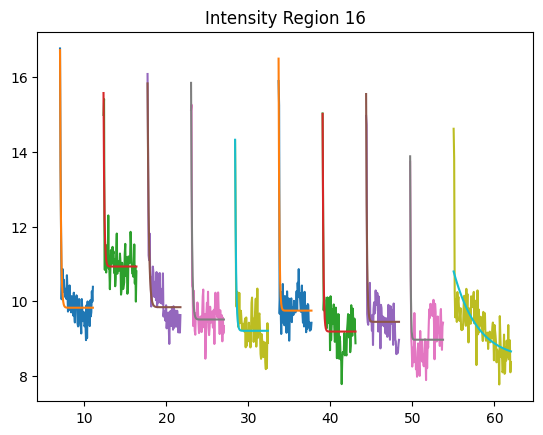

In [167]:
taus_baf = [] #список списков тау по колонкам

for num, col in enumerate(data_baf.columns[2:]):
    t = np.array(data_baf['t']) #массив всего времени
    val = np.array(data_baf[col]) #массив всех величин столбца
    
    ts = [] #список списков времен по отрезкам
    vals = [] #список списков величин по отрезкам
    
    tau = [] #список тау
    
    for i in range(len(off_baf)):
        ts.append(t[off_baf[i]:on_baf[i+1]])
        vals.append(val[off_baf[i]:on_baf[i+1]])

    for i in range(len(off_baf)):
        popt, pcov = curve_fit(exp, ts[i]-ts[i][0], vals[i], p0 = [35, 1, 100])
        print(popt)
        plt.plot(ts[i], vals[i])
        plt.plot(ts[i], exp(ts[i]-ts[i][0], *popt))
        tau.append(popt[1])
        
#         chi = stats.chisquare(vals[i], exp(ts[i]-ts[i][0], *popt))[0]
#         print('chi2 = ',  chi)
#         curve_fit
       
        
    taus_baf.append(tau)

    plt.title(col)
    plt.show()

In [168]:
for taus_list in [taus_NT_1, taus_NT_2, taus_pr_1, taus_pr_2, taus_baf]:
    for i in taus_list:
        for j in i:
            if ((j>=5) or (j<=10**(-3))):
                i.remove(j)

In [169]:
taus_NT_1[0].pop(3)
taus_NT_1[2].pop(2)
taus_NT_1[3] = taus_NT_1[3][0:2]
taus_NT_1[5] = taus_NT_1[5][0:3]

In [170]:
for i in range(len(taus_baf)):
    taus_baf[i] = taus_baf[i][0:8]

In [174]:
taus_pr_2

[[2.137966227345765,
  0.35240649195577745,
  3.2116223798150187,
  46.099665997819066,
  1.5715378415367822,
  1.9769762197169545,
  30914.292781394026,
  34215.46241060983,
  0.2362413666512455,
  0.07708085607531666],
 [0.2205314741598227,
  0.6166695481837008,
  0.3479700057258131,
  0.1626734544316075,
  0.9071857433611802,
  1.0776572936767315,
  0.2230771486801242,
  0.5763843474263716,
  0.7070953060464765,
  1.2740502920954249],
 [0.2503384106212667,
  0.12175435624298256,
  0.17154178514058802,
  1.4858676493036027,
  1.1335214186442188,
  11580.331837734695,
  0.6910991180925676,
  0.15657593080156745,
  0.9770230177323028,
  0.3923470480752365],
 [0.2099018614811798,
  0.19347418910101147,
  0.037724977694252586,
  0.1478040603938509,
  0.11064329737586127,
  0.21010015445803024,
  0.17662121612384424,
  0.027840594472887212,
  0.21664896594759164,
  0.053174452665027905],
 [0.13722127674238913,
  0.5162540355192836,
  0.07067211555822205,
  0.09867834365130092,
  3.4228626

## NT and Baf 

In [22]:
taus_NT = taus_NT_1+taus_NT_2

all_taus_NT_1 = sum(taus_NT_1, [])
all_taus_NT_2 = sum(taus_NT_2, [])
all_taus_baf = sum(taus_baf, [])

all_taus_NT = sum(taus_NT, [])

mean_taus_NT_1 = list(map(np.mean, taus_NT_1))
mean_taus_NT_2 = list(map(np.mean, taus_NT_2))
mean_taus_baf = list(map(np.mean, taus_baf))

mean_taus_NT =  list(map(np.mean, taus_NT))


In [26]:
def p_value(p):
    if ((0.05 < p) & (p <= 1)):
        return 'ns'
    elif ((0.01 < p) & (p <= 0.05)):
        return '*'
    elif ((0.001 < p) & (p <= 0.01)):
        return '**'
    elif ((0.0001 < p) & (p <= 0.001)):
        return '***'
    elif (p <= 0.0001):
        return '****'
p_value_vec = np.vectorize(p_value)

In [27]:
res = stats.ttest_ind(a=all_taus_NT, b=all_taus_baf)
p = p_value(res[1])
p

'****'

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

NT v.s. Baf: Custom statistical test, P_val:2.283e-06


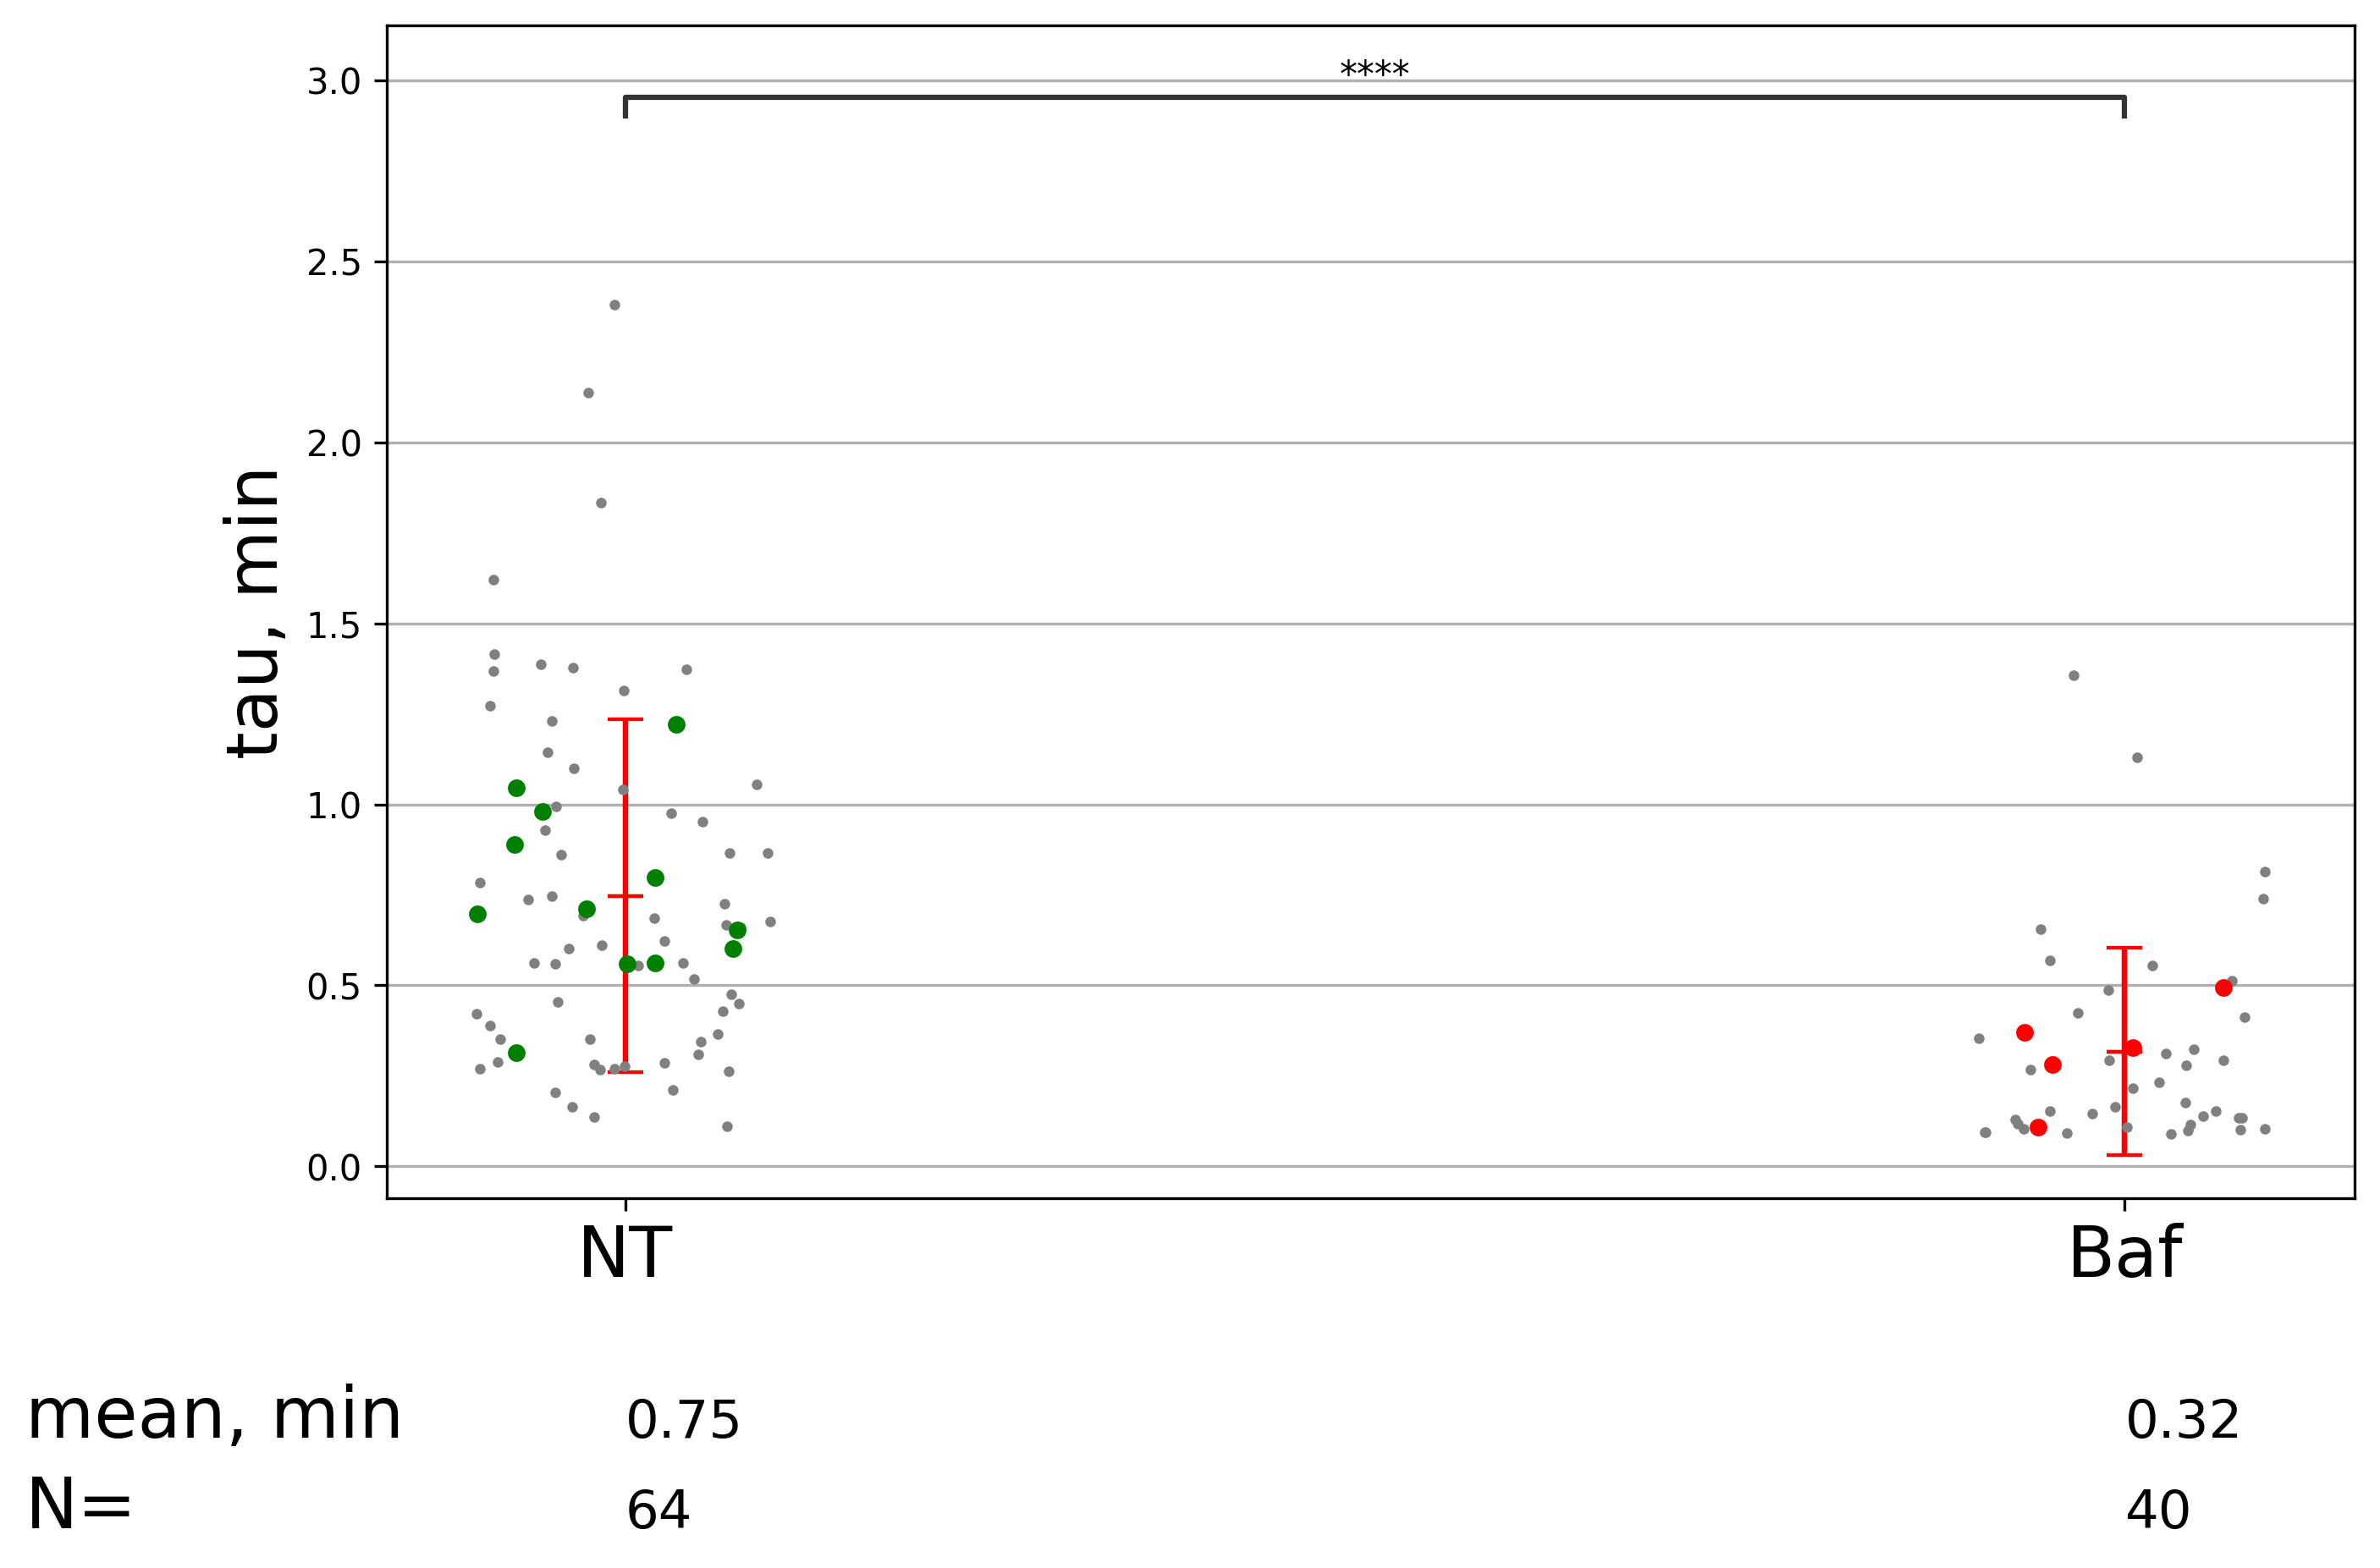

In [33]:
y = np.array([np.mean(all_taus_NT), np.mean(all_taus_baf)])
x = ['NT', 'Baf']
yerr = [np.std(all_taus_NT), np.std(all_taus_baf)]

c = ['gray']
colors = ['green', 'red']
sns.set_palette(c)

fig = plt.figure(figsize = (10, 6), dpi = 300)
ax0 = plt.subplot(1, 1, 1)

for i in range(2):
    ax0.errorbar([x[i]], [y[i]], yerr=[yerr[i]], capsize=5,  fmt = ' ', color = colors[i])
    ax0.errorbar([x[i]], [y[i]], yerr=[0], capsize=5,  fmt = ' ', color = colors[i])

ax0.errorbar(x, y, yerr=yerr, capsize=5,  fmt = ' ', color = 'red')
ax0.errorbar(x, y, yerr=np.zeros(2), capsize=5,  fmt = ' ', color = 'red')

sns.stripplot(x=['NT']*len(all_taus_NT), y=all_taus_NT, size = 3)
sns.stripplot(x=['Baf']*len(all_taus_baf), y=all_taus_baf, size = 3)

sns.stripplot(x=['NT']*len(mean_taus_NT), y=mean_taus_NT, color='green')
sns.stripplot(x=['Baf']*len(mean_taus_baf), y=mean_taus_baf, color = 'red')

plt.ylabel('tau, min', size = 20)
plt.grid(axis='y')
plt.xticks(rotation = 0, size = 20)
# plt.ylim(0, 8)

add_stat_annotation(ax0, x=x, y=y+2, perform_stat_test=False, box_pairs=[['NT', 'Baf']],  pvalues=[res[1]])



#draw number of experiments, mean, 
N=[len(all_taus_NT), len(all_taus_baf)]
mean=[np.mean(all_taus_NT), np.mean(all_taus_baf)]
plt.text(-0.4, -1, 'N=', fontsize=20)
plt.text(-0.4, -0.75, 'mean, min', fontsize=20) #i+1, count[i], 'lyso-NsXeR'
for i in range(0, 2):
    #plt.text(i-0.275, -75, 'N=', fontsize=45) #i+1, count[i], 'lyso-NsXeR'
    plt.text(i, -1, N[i], fontsize=15) #i+1, count[i], 'lyso-NsXeR'
    plt.text(i, -0.75, round(mean[i], 2), fontsize=15) #i+1, count[i], 'lyso-NsXeR'
    #plt.text(i+0.055, -75, '', fontsize=35) #i+1, count[i], 'lyso-NsXeR'
    #exp format '%.1E' % Decimal(mean[i])
plt.show()

## New plots

In [136]:
def min_max_norm(arr):
    return (arr - min(arr))/(max(arr)- min(arr))

In [143]:
goods_NT = []

for num, col in enumerate(data_NT_2.columns[2:]):
    t = np.array(data_NT_2['t']) #массив всего времени
    val = np.array(data_NT_2[col]) #массив всех величин столбца
    
    for i in range(len(off_NT_2)):
        t_for_ap = t[off_NT_2[i]:on_NT_2[i+1]]
        val_for_ap = val[off_NT_2[i]:on_NT_2[i+1]]
        if (len(t_for_ap) == 63):
            goods_NT.append(min_max_norm(val_for_ap))
            
goods_baf = []
            
for num, col in enumerate(data_baf.columns[2:]):
    t = np.array(data_baf['t']) #массив всего времени
    val = np.array(data_baf[col]) #массив всех величин столбца
    
    for i in range(len(off_baf)):
        t_for_ap = t[off_baf[i]:on_baf[i+1]]
        
        
        
        
        
        val_for_ap = val[off_baf[i]:on_baf[i+1]]
        if (len(t_for_ap) == 63):
            goods_baf.append(min_max_norm(val_for_ap))
            


In [144]:
goods_NT = np.array(goods_NT)
goods_baf = np.array(goods_baf)

means_NT = np.mean(goods_NT, axis = 0)
stds_NT = np.std(goods_NT, axis = 0)

means_baf = np.mean(goods_baf, axis = 0)
stds_baf = np.std(goods_baf, axis = 0)

In [145]:
step = 0.06467
time_axis = np.linspace(0, step*63, 63, endpoint=False)

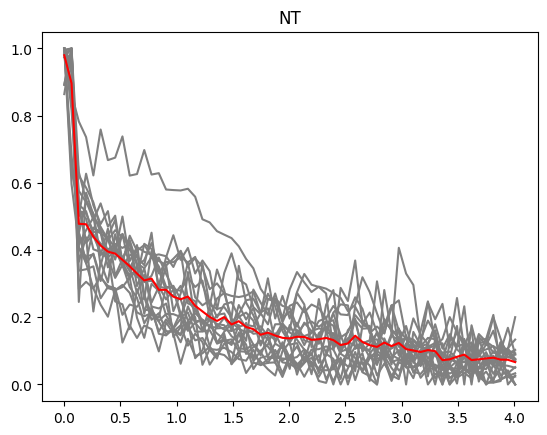

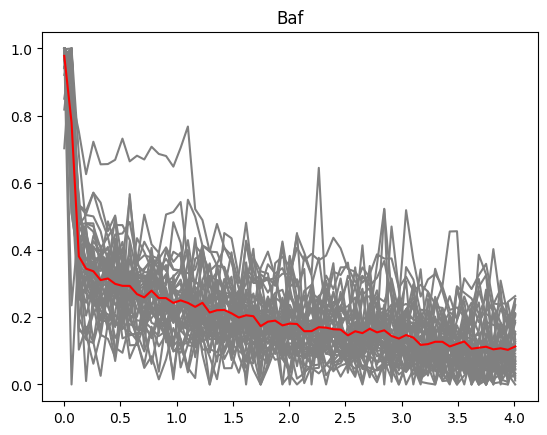

In [146]:
for i in goods_NT:
    plt.plot(time_axis, i)
plt.plot(time_axis, means_NT, c='red')
plt.title('NT')
plt.show()
for i in goods_baf:
    plt.plot(time_axis, i)
plt.plot(time_axis, means_baf, c = 'red')
plt.title('Baf')
plt.show()

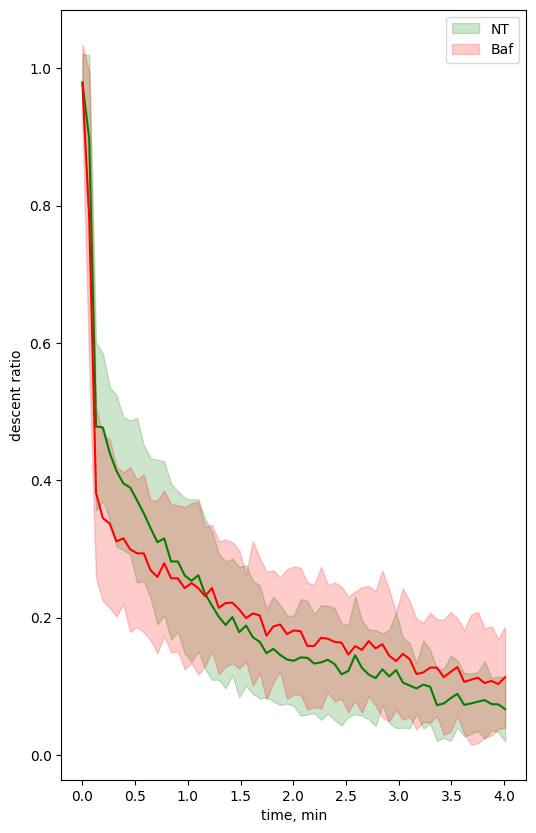

In [147]:
fig = plt.figure(figsize = (6, 10), dpi = 100)
ax0 = plt.subplot(1, 1, 1)

plt.plot(time_axis, means_NT, c = 'green')
ax0.fill_between(time_axis, means_NT - stds_NT, means_NT + stds_NT, alpha=0.2, color = 'green', label = 'NT')
plt.plot(time_axis, means_baf, c = 'red')
ax0.fill_between(time_axis, means_baf - stds_baf, means_baf + stds_baf, alpha=0.2, color = 'red', label = 'Baf')
plt.xlabel('time, min')
plt.ylabel('descent ratio')


plt.legend()
plt.show()



## Tau(Time)

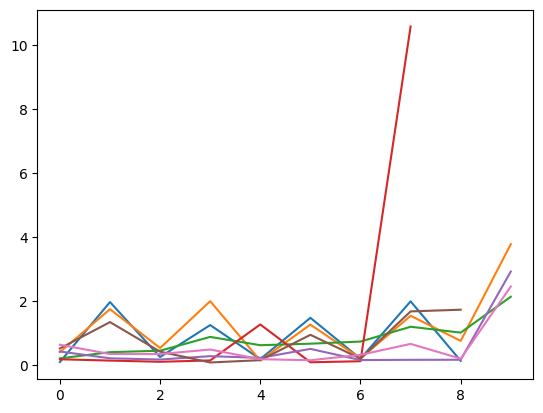

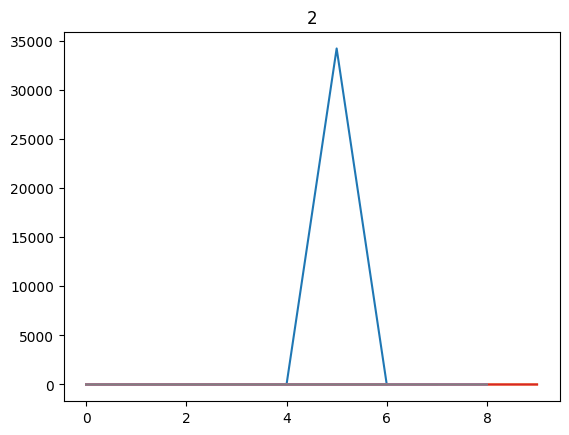

In [171]:
for time_series in taus_pr_1:
    plt.plot(time_series)
plt.show()
for time_series in taus_pr_2:
    plt.plot(time_series)
    plt.title('2')
plt.show()